In [160]:
#import vega
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import math
import subprocess, os
from copy import deepcopy
import probscale
import matplotlib
import matplotlib.gridspec as gridspec
from osgeo import gdal
import rasterio
from rasterio.plot import show
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
#import altair as alt
#import plotly.express as px
#import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import random
import string

In [161]:
plt.rcParams['scatter.marker'] = '^'

In [162]:
#function to export as EMF by using Inkscape: found at https://stackoverflow.com/questions/9266150/matplotlib-generating-vector-plot 
def plot_as_emf(figure, **kwargs):
    inkscape_path = kwargs.get('inkscape', "C://Program Files//Inkscape//inkscape.exe")
    filepath = kwargs.get('filename', None)

    if filepath is not None:
        path, filename = os.path.split(filepath)
        filename, extension = os.path.splitext(filename)

        svg_filepath = os.path.join(path, filename+'.svg')
        emf_filepath = os.path.join(path, filename+'.emf')

        figure.savefig(svg_filepath, format='svg', bbox_inches = 'tight')

        subprocess.call([inkscape_path, svg_filepath, '--export-emf', emf_filepath])
        os.remove(svg_filepath)
        
#Sample usage: plot_as_emf(f, filename="Output.emf")

In [163]:
random.seed(213)

In [164]:
#Pandas dataframe settings

#display format of decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#remove display limitation of rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [165]:
data = pd.read_csv('../02_Export/CSV/DB_SG_IMPUTTED_PCA.csv', index_col='Sample')
data_raw = pd.read_csv('../02_Export/CSV/DB_SG_ORIG_IMPUTTED_PCA.csv', index_col='Sample')
data_molar = pd.read_excel('../02_Export/CSV/get_molars.xlsx', index_col='Sample')

In [166]:
data_molar = data_molar.loc[(data_molar['Source'] == 'Fernandes') & (data_molar['Unit'] == 'Serra do Garrote')]

In [167]:
data_raw = data_raw.add_prefix('org_')

In [168]:
data = pd.concat([data, data_raw.loc[:,'org_Al2O3':'org_LOI'], data_molar[['Na (Molar)', 'Al (Molar)', 'K (Molar)']]], axis = 1)

In [169]:
data.reset_index(inplace = True)

In [170]:
elements = data.loc[:,'Al2O3':'LOI']
scaler = StandardScaler()
elements = scaler.fit_transform(elements)

In [171]:
dist_mat = pd.read_csv('../02_Export/CSV/Dist_Mat_clr.csv')
dist_mat = dist_mat.to_numpy()
model_tsne = TSNE(n_components=2, metric= 'precomputed', random_state = 213)
transformed_tsne = model_tsne.fit_transform(dist_mat)
transformed_tsne_dist_mat_df = pd.DataFrame(transformed_tsne)
transformed_tsne_dist_mat_df.rename(columns = {0:'X_tsne_dist', 1:'Y_tsne_dist'}, inplace = True)
data = pd.concat([data,transformed_tsne_dist_mat_df],axis = 1)


dist_mat = pd.read_csv('../02_Export/CSV/Dist_Mat_clr_facies.csv')
dist_mat = dist_mat.to_numpy()
model_tsne = TSNE(n_components=2, metric= 'precomputed', random_state=213)
transformed_tsne = model_tsne.fit_transform(dist_mat)
transformed_tsne_dist_mat_facies_df = pd.DataFrame(transformed_tsne)
transformed_tsne_dist_mat_facies_df.rename(columns = {0:'X_tsne_dist_facies', 1:'Y_tsne_dist_facies'}, inplace = True)
data = pd.concat([data,transformed_tsne_dist_mat_facies_df],axis = 1)

In [172]:
data.head()

,Sample,Unnamed: 0,Source,Year,UTM_X,Random_X,UTM_Y,Random_Y,UTM_Z,Z_True,Region,Occurrence,Section,Hole.ID,Depth,Unit,Subunit,Lithofacies,Orebody,Al2O3,BaO,CaO,Cr2O3,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SiO2,SrO,TiO2,Ba,Ce,Cr,Cs,Dy,Er,Eu,Ga,Gd,Hf,Ho,La,Lu,Nb,Nd,Pr,Rb,Sm,Sn,Sr,Ta,Tb,Th,Tm,U,V,W,Y,Yb,Zr,Cd,Co,Cu,Li,Mo,Ni,Pb,Sc,Zn,As,Bi,Hg,In,Re,Sb,Sc.1,Se,Te,Tl,S,C,C.organic,LOI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,org_Al2O3,org_BaO,org_CaO,org_Cr2O3,org_Fe2O3,org_K2O,org_MgO,org_MnO,org_Na2O,org_P2O5,org_SiO2,org_SrO,org_TiO2,org_Ba,org_Ce,org_Cr,org_Cs,org_Dy,org_Er,org_Eu,org_Ga,org_Gd,org_Hf,org_Ho,org_La,org_Lu,org_Nb,org_Nd,org_Pr,org_Rb,org_Sm,org_Sn,org_Sr,org_Ta,org_Tb,org_Th,org_Tm,org_U,org_V,org_W,org_Y,org_Yb,org_Zr,org_Cd,org_Co,org_Cu,org_Li,org_Mo,org_Ni,org_Pb,org_Sc,org_Zn,org_As,org_Bi,org_Hg,org_In,org_Re,org_Sb,org_Sc.1,org_Se,org_Te,org_Tl,org_S,org_C,org_C.organic,org_LOI,Na (Molar),Al (Molar),K (Molar),X_tsne_dist,Y_tsne_dist,X_tsne_dist_facies,Y_tsne_dist_facies
0,VZRO032000,1,Fernandes,2016,307100.000,308995.000,8144353.000,8144674.000,578.200,403.600,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,174.600,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.584,3.541,4.177,1.344,7.716,7.258,6.990,2.443,5.387,3.424,10.176,1.344,5.675,3.417,1.032,1.121,-1.167,-1.793,-2.260,-3.323,-0.207,-1.703,-1.469,-3.389,0.334,-4.128,-0.666,0.186,-1.174,1.670,-1.435,-2.162,1.142,-3.261,-3.562,-0.700,-4.177,-1.819,1.158,-2.162,-0.018,-2.200,2.190,-3.168,-0.553,-0.003,0.428,-3.261,0.205,-0.371,-0.776,1.543,-2.428,-4.822,-6.237,-6.277,-10.080,-4.775,-1.593,-3.954,-5.920,-5.920,3.424,4.928,4.900,7.179,-5.090,0.719,-0.824,0.777,-2.470,0.545,-2.486,0.895,-0.612,-0.121,-0.382,0.379,-0.661,-0.297,1.148,0.306,0.306,0.618,-1.025,-0.629,0.423,-1.265,-0.563,0.122,-0.025,0.085,0.634,0.638,-0.258,-0.531,0.169,-0.009,-0.253,0.443,0.251,0.012,-0.526,-0.341,0.097,0.275,0.068,0.319,-0.149,0.373,0.429,-0.022,-0.064,-0.067,0.093,-0.112,-0.192,-0.040,-0.118,0.085,-0.122,-0.195,-0.008,0.102,-0.032,-0.109,-0.025,-0.002,0.001,-0.034,-0.002,0.000,139400,900,1700,100,58500,37000,28300,300,5700,800,684600.000,100,7600,795.000,73.200,80,8.120,4.340,2.720,0.940,21.200,4.750,6.000,0.880,36.400,0.420,13.400,31.400,8.060,138.500,6.210,3,81.700,1.000,0.740,12.950,0.400,4.230,83,3.000,25.600,2.890,233,1.098,15,26,40,1.000,32,18.000,12,122,2.300,0.210,0.051,0.049,0.001,0.220,5.300,0.500,0.070,0.070,800,3600,3500,34200,0.018,0.273,0.079,6.025,16.566,3.730,9.993
1,VZRO032001,2,Fernandes,2016,307100.000,303235.000,8144353.000,8145102.000,578.200,379.900,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,198.300,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.447,3.199,4.351,1.407,7.738,7.052,6.979,2.506,5.358,3.353,10.303,1.407,5.501,3.271,1.060,0.896,-1.337,-1.866,-2.323,-3.349,-0.371,-1.619,-1.358,-3.447,0.310,-4.192,-0.782,0.223,-1.124,1.470,-1.356,-2.505,0.747,-0.800,-3.541,-0.823,-4.248,-2.370,1.050,-2.100,-0.094,-2.331,2.282,-3.035,-0.633,-0.308,0.491,-3.198,0.098,-0.365,-0.896,2.134,-1.945,-5.031,-5.675,-5.901,-10.121,-4.625,-1.837,-3.709,-5.606,-5.724,3.199,4.403,4.240,7.070,-4.681,1.749,-0.275,0.922,-3.800,0.494,-4.341,0.711,1.617,-0.603,-1.481,-1.559,-2.344,-1.003,-1.969,0.521,-1.139,1.984,-1.056,2.551,1.007,-0.239,-0.021,-0.169,0.162,1.520,-0.560,0.388,-0.320,-0.586,-0.146,0.240,-0.314,0.375,0.095,0.196,-0.134,-0.061,0.013,-0.045,-0.294,-0.239,-0.210,0.051,-0.132,-0.195,0.007,0.194,0.238,0.010,0.014,0.141,-0.158,0.167,-0.045,-0.192,0.117,0.069,0.036,0.017,-0.059,0.004,0.011,0.027,-0.018,0.000,114200,600,1900,100,56200,28300,26300,300,5200,700,730300.000,100,6000,645.000,70.700,60,6.430,3.790,2.400,0.860,16.900,4.850,6.300,0.780,33.400,0.370,11.200,30.600,7.960,106.5

In [173]:
data['org_La_Th'] = data['org_La'] / data['org_Th']
data['Na_Al'] = (data['Na (Molar)'] / data['Al (Molar)'])
data['K_Al'] = data['K (Molar)'] / data['Al (Molar)']

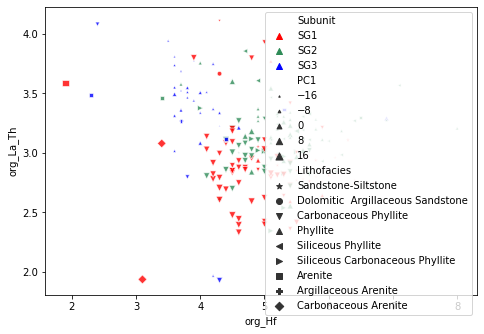

In [174]:
sns.scatterplot(
    x='org_Hf', 
    y = 'org_La_Th', 
    data = data, 
    hue = 'Subunit',
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = 'Lithofacies', 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    size = 'PC1', 
    sizes=(2,50), 
    alpha = 0.8,
    #ax = axes[1,1]
    
)


plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1)

In [175]:
data.head()

,Sample,Unnamed: 0,Source,Year,UTM_X,Random_X,UTM_Y,Random_Y,UTM_Z,Z_True,Region,Occurrence,Section,Hole.ID,Depth,Unit,Subunit,Lithofacies,Orebody,Al2O3,BaO,CaO,Cr2O3,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SiO2,SrO,TiO2,Ba,Ce,Cr,Cs,Dy,Er,Eu,Ga,Gd,Hf,Ho,La,Lu,Nb,Nd,Pr,Rb,Sm,Sn,Sr,Ta,Tb,Th,Tm,U,V,W,Y,Yb,Zr,Cd,Co,Cu,Li,Mo,Ni,Pb,Sc,Zn,As,Bi,Hg,In,Re,Sb,Sc.1,Se,Te,Tl,S,C,C.organic,LOI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,org_Al2O3,org_BaO,org_CaO,org_Cr2O3,org_Fe2O3,org_K2O,org_MgO,org_MnO,org_Na2O,org_P2O5,org_SiO2,org_SrO,org_TiO2,org_Ba,org_Ce,org_Cr,org_Cs,org_Dy,org_Er,org_Eu,org_Ga,org_Gd,org_Hf,org_Ho,org_La,org_Lu,org_Nb,org_Nd,org_Pr,org_Rb,org_Sm,org_Sn,org_Sr,org_Ta,org_Tb,org_Th,org_Tm,org_U,org_V,org_W,org_Y,org_Yb,org_Zr,org_Cd,org_Co,org_Cu,org_Li,org_Mo,org_Ni,org_Pb,org_Sc,org_Zn,org_As,org_Bi,org_Hg,org_In,org_Re,org_Sb,org_Sc.1,org_Se,org_Te,org_Tl,org_S,org_C,org_C.organic,org_LOI,Na (Molar),Al (Molar),K (Molar),X_tsne_dist,Y_tsne_dist,X_tsne_dist_facies,Y_tsne_dist_facies,org_La_Th,Na_Al,K_Al
0,VZRO032000,1,Fernandes,2016,307100.000,308995.000,8144353.000,8144674.000,578.200,403.600,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,174.600,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.584,3.541,4.177,1.344,7.716,7.258,6.990,2.443,5.387,3.424,10.176,1.344,5.675,3.417,1.032,1.121,-1.167,-1.793,-2.260,-3.323,-0.207,-1.703,-1.469,-3.389,0.334,-4.128,-0.666,0.186,-1.174,1.670,-1.435,-2.162,1.142,-3.261,-3.562,-0.700,-4.177,-1.819,1.158,-2.162,-0.018,-2.200,2.190,-3.168,-0.553,-0.003,0.428,-3.261,0.205,-0.371,-0.776,1.543,-2.428,-4.822,-6.237,-6.277,-10.080,-4.775,-1.593,-3.954,-5.920,-5.920,3.424,4.928,4.900,7.179,-5.090,0.719,-0.824,0.777,-2.470,0.545,-2.486,0.895,-0.612,-0.121,-0.382,0.379,-0.661,-0.297,1.148,0.306,0.306,0.618,-1.025,-0.629,0.423,-1.265,-0.563,0.122,-0.025,0.085,0.634,0.638,-0.258,-0.531,0.169,-0.009,-0.253,0.443,0.251,0.012,-0.526,-0.341,0.097,0.275,0.068,0.319,-0.149,0.373,0.429,-0.022,-0.064,-0.067,0.093,-0.112,-0.192,-0.040,-0.118,0.085,-0.122,-0.195,-0.008,0.102,-0.032,-0.109,-0.025,-0.002,0.001,-0.034,-0.002,0.000,139400,900,1700,100,58500,37000,28300,300,5700,800,684600.000,100,7600,795.000,73.200,80,8.120,4.340,2.720,0.940,21.200,4.750,6.000,0.880,36.400,0.420,13.400,31.400,8.060,138.500,6.210,3,81.700,1.000,0.740,12.950,0.400,4.230,83,3.000,25.600,2.890,233,1.098,15,26,40,1.000,32,18.000,12,122,2.300,0.210,0.051,0.049,0.001,0.220,5.300,0.500,0.070,0.070,800,3600,3500,34200,0.018,0.273,0.079,6.025,16.566,3.730,9.993,2.811,0.067,0.287
1,VZRO032001,2,Fernandes,2016,307100.000,303235.000,8144353.000,8145102.000,578.200,379.900,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,198.300,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.447,3.199,4.351,1.407,7.738,7.052,6.979,2.506,5.358,3.353,10.303,1.407,5.501,3.271,1.060,0.896,-1.337,-1.866,-2.323,-3.349,-0.371,-1.619,-1.358,-3.447,0.310,-4.192,-0.782,0.223,-1.124,1.470,-1.356,-2.505,0.747,-0.800,-3.541,-0.823,-4.248,-2.370,1.050,-2.100,-0.094,-2.331,2.282,-3.035,-0.633,-0.308,0.491,-3.198,0.098,-0.365,-0.896,2.134,-1.945,-5.031,-5.675,-5.901,-10.121,-4.625,-1.837,-3.709,-5.606,-5.724,3.199,4.403,4.240,7.070,-4.681,1.749,-0.275,0.922,-3.800,0.494,-4.341,0.711,1.617,-0.603,-1.481,-1.559,-2.344,-1.003,-1.969,0.521,-1.139,1.984,-1.056,2.551,1.007,-0.239,-0.021,-0.169,0.162,1.520,-0.560,0.388,-0.320,-0.586,-0.146,0.240,-0.314,0.375,0.095,0.196,-0.134,-0.061,0.013,-0.045,-0.294,-0.239,-0.210,0.051,-0.132,-0.195,0.007,0.194,0.238,0.010,0.014,0.141,-0.158,0.167,-0.045,-0.192,0.117,0.069,0.036,0.017,-0.059,0.004,0.011,0.027,-0.018,0.000,114200,600,1900,100,56200,28300,26300,300,5200,700,730300.000,100,6000,645.000,70.700,60,6.430,3.790,2.400,0.860,16.900,4.850,6.300,0.780

In [176]:
data['Test_PC'] = np.nan
pc_visual = 'PC2'
data['Test_PC'] = np.where(data[pc_visual] <= 0,'-'+str(pc_visual),'+' + str(pc_visual))

In [177]:
data['PC_SG_comb'] = data.Test_PC.map(str) + "/" + data.Subunit

In [178]:
data['PC_SG_comb'].unique().tolist()

['+PC2/SG1', '-PC2/SG3', '-PC2/SG1', '+PC2/SG2', '-PC2/SG2', '+PC2/SG3']

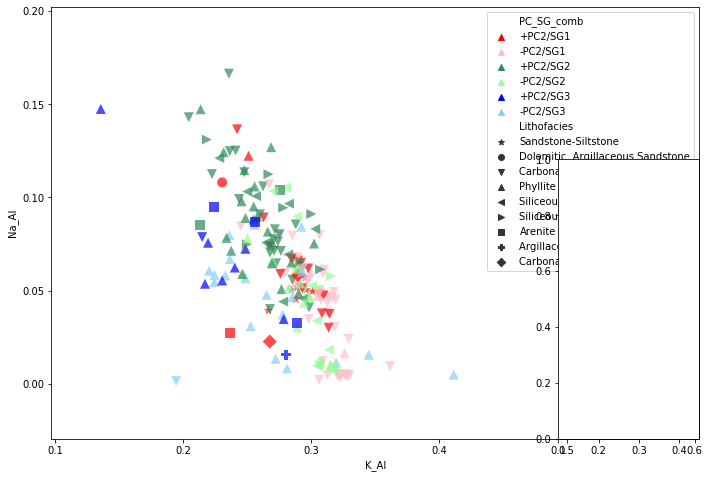

In [179]:
fig = plt.figure()
spec2 = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
#f2_ax1 = fig.add_subplot(spec2[0, 0])
f2_ax2 = fig.add_subplot(spec2[:, :4])
f2_ax3 = fig.add_subplot(spec2[1:,3])
#f2_ax4 = fig.add_subplot(spec2[1:,:3])

sns.scatterplot(
    x='K_Al', 
    y = 'Na_Al', 
    data = data,
    hue = 'PC_SG_comb',
    hue_order = ['+PC2/SG1','-PC2/SG1', '+PC2/SG2', '-PC2/SG2',  '+PC2/SG3','-PC2/SG3'],
    palette= ['red','pink','seagreen','palegreen', 'blue', 'lightskyblue'],
    #palette = 'pastel',
    style = 'Lithofacies', 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    s = 100,
    #size = 'PC1', 
    #sizes=(20,500), 
    alpha = 0.7,
    #ax = axes[1,1]
    edgecolor="none",
    ax = f2_ax2
)
plt.xlim(0.1,0.45)



plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5)
#plt.savefig('../02_Export/FIGURES/NaAl_KAl_PC2_Lithofacies.png', bbox_inches="tight", dpi=300)

In [180]:
data['org_Zr_10'] = data['org_Zr'] / 10 

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaler = MinMaxScaler()

In [183]:
data['scl_PC17'] = scaler.fit_transform(np.array(data['PC17']).reshape(-1, 1))

In [184]:
def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }


In [185]:
data['Occurrence'].unique().tolist()

['Serra da Pindaiba',
 'Ponte Quemada',
 'Lapa Azul',
 'Ambrosia',
 'Ambrosia Norte',
 'Cafundo',
 'Corrego Rico',
 'Engenho Velho',
 'Morro Agudo',
 'North Extension',
 'Mata Preta',
 "Olho D'Agua",
 'Varginha']

Clean the occurrence column by merging nearly same sections:

In [186]:
#First, copy the Occurrence column
data['sum_occ'] = data['Occurrence'].copy()

In [187]:
data.loc[(data['Occurrence'] == 'Ambrosia') | (data['Occurrence'] == 'Ambrosia Norte'),'sum_occ'] = 'Ambrosia & Amb. North'
data.loc[(data['Occurrence'] == "Olho D'Agua") | (data['Occurrence'] == 'Varginha'),'sum_occ'] = "Olho D'Agua & Varginha"

In [188]:
#['*','o','v','^','<','>','s','P','D','d','X','H','p']

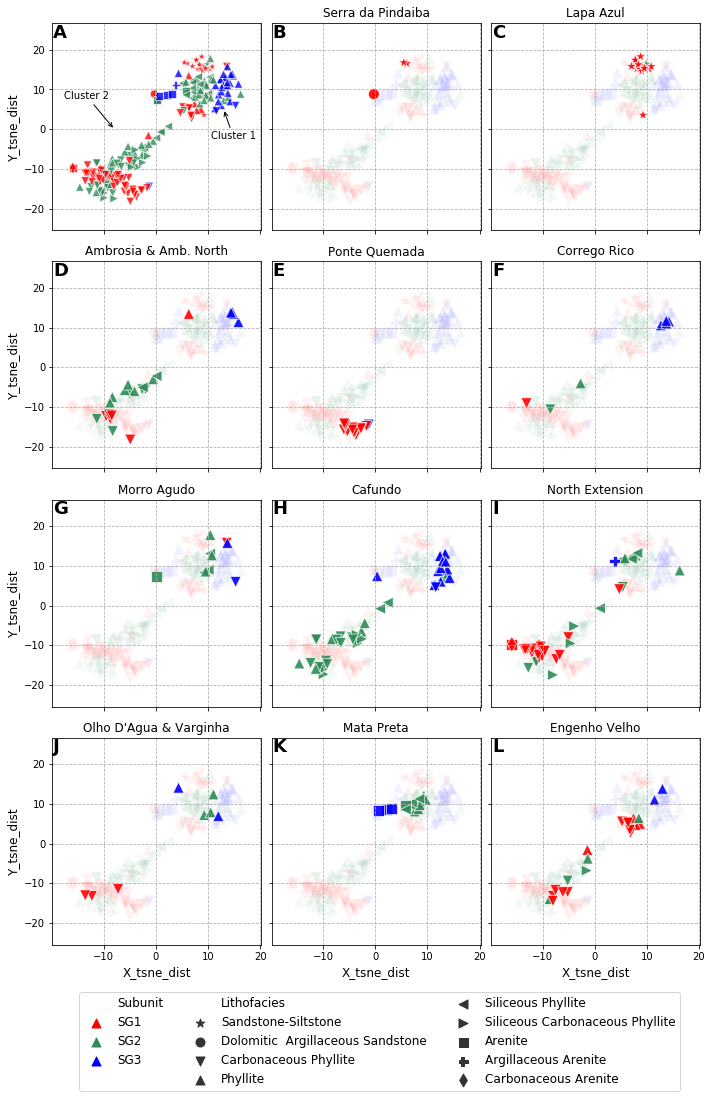

In [189]:
%matplotlib inline

marker_dict = {
'Sandstone-Siltstone':'*',
'Dolomitic  Argillaceous Sandstone':'o',
'Carbonaceous Phyllite':'v',
'Phyllite':'^',
'Siliceous Phyllite':'<',
'Siliceous Carbonaceous Phyllite':'>',
'Arenite':'s',
'Argillaceous Arenite':'P',
'Carbonaceous Arenite':'d'
}


plt.rcParams['scatter.marker'] = '^'

nrows = 4
ncolumns = 3
f, axes = plt.subplots(nrows,ncolumns, sharex=True, sharey=True)
axes = axes.flatten()

sns.scatterplot(
x='X_tsne_dist', 
y = 'Y_tsne_dist', 
data = data, 
hue = 'Subunit',
hue_order = ['SG1','SG2','SG3'],
palette= ['red','seagreen','blue'],
#palette = 'pastel',
style = 'Lithofacies', 
markers=marker_dict, 
s = 70,
alpha = 0.8,
ax = axes[0]

)
axes[0].legend().set_visible(False)
axes[0].text(0.005, 0.93, string.ascii_uppercase[0], transform=axes[0].transAxes, size=18, weight='bold')
axes[0].grid('both', ls = '--')
axes[0].annotate('Cluster 2',
            xy=(-8, 0), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

axes[0].annotate('Cluster 1',
            xy=(13, 5), xycoords='data',
            xytext=(-13, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
axes[0].plot(np.NaN, np.NaN, '-', color='none', label=' ')
axes[0].xaxis.label.set_size(12)
axes[0].yaxis.label.set_size(12)

for i, occ in enumerate(data.sort_values(by = ['UTM_Y'], ascending=False)['sum_occ'].unique()):
    
    data_plot = data.loc[data['sum_occ'] == occ]
    
    sns.scatterplot(
    x='X_tsne_dist', 
    y = 'Y_tsne_dist', 
    data = data, 
    hue = 'Subunit',
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = 'Lithofacies', 
    markers=marker_dict, 
    s = 120, 
    #sizes=(50,250),
    alpha = 0.05,
    ax = axes[i+1]
    
    )
    
    sns.scatterplot(
    x='X_tsne_dist', 
    y = 'Y_tsne_dist', 
    data = data_plot, 
    hue = 'Subunit',
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = 'Lithofacies', 
    markers=marker_dict, 
    s = 120, 
    #sizes=(50,250),
    alpha = 0.9,
    ax = axes[i+1]
    
    )
    
    
    handles, labels = axes[i+1].get_legend_handles_labels()
    axes[i+1].set_title(str(occ))
    axes[i+1].legend(handles = handles[:-6], labels = labels[:-6], ncol=1, prop={"size":10}).set_visible(False)
    axes[i+1].text(0.005, 0.93, string.ascii_uppercase[i+1], transform=axes[i+1].transAxes, size=18, weight='bold')
    axes[i+1].grid('both', ls = '--')
    axes[i+1].xaxis.label.set_size(12)
    axes[i+1].yaxis.label.set_size(12)

handles, labels = axes[0].get_legend_handles_labels()
labels.insert(5,labels[0])
handles.insert(5,handles[0])
labels = labels[1:]
handles = handles[1:]
axes[-1].legend(handles = handles, labels = labels, ncol=3, prop={"size":12}, 
                bbox_to_anchor=(-2,-0.2), loc='upper left', markerscale=1.5).set_visible(True)



plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.80 * nrows, wspace=0.05, hspace=0.15)
plt.savefig('../02_Export/FIGURES/tsne_all.png', bbox_inches="tight", dpi=300)


In [190]:
data.head()

,Sample,Unnamed: 0,Source,Year,UTM_X,Random_X,UTM_Y,Random_Y,UTM_Z,Z_True,Region,Occurrence,Section,Hole.ID,Depth,Unit,Subunit,Lithofacies,Orebody,Al2O3,BaO,CaO,Cr2O3,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SiO2,SrO,TiO2,Ba,Ce,Cr,Cs,Dy,Er,Eu,Ga,Gd,Hf,Ho,La,Lu,Nb,Nd,Pr,Rb,Sm,Sn,Sr,Ta,Tb,Th,Tm,U,V,W,Y,Yb,Zr,Cd,Co,Cu,Li,Mo,Ni,Pb,Sc,Zn,As,Bi,Hg,In,Re,Sb,Sc.1,Se,Te,Tl,S,C,C.organic,LOI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,org_Al2O3,org_BaO,org_CaO,org_Cr2O3,org_Fe2O3,org_K2O,org_MgO,org_MnO,org_Na2O,org_P2O5,org_SiO2,org_SrO,org_TiO2,org_Ba,org_Ce,org_Cr,org_Cs,org_Dy,org_Er,org_Eu,org_Ga,org_Gd,org_Hf,org_Ho,org_La,org_Lu,org_Nb,org_Nd,org_Pr,org_Rb,org_Sm,org_Sn,org_Sr,org_Ta,org_Tb,org_Th,org_Tm,org_U,org_V,org_W,org_Y,org_Yb,org_Zr,org_Cd,org_Co,org_Cu,org_Li,org_Mo,org_Ni,org_Pb,org_Sc,org_Zn,org_As,org_Bi,org_Hg,org_In,org_Re,org_Sb,org_Sc.1,org_Se,org_Te,org_Tl,org_S,org_C,org_C.organic,org_LOI,Na (Molar),Al (Molar),K (Molar),X_tsne_dist,Y_tsne_dist,X_tsne_dist_facies,Y_tsne_dist_facies,org_La_Th,Na_Al,K_Al,Test_PC,PC_SG_comb,org_Zr_10,scl_PC17,sum_occ
0,VZRO032000,1,Fernandes,2016,307100.000,308995.000,8144353.000,8144674.000,578.200,403.600,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,174.600,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.584,3.541,4.177,1.344,7.716,7.258,6.990,2.443,5.387,3.424,10.176,1.344,5.675,3.417,1.032,1.121,-1.167,-1.793,-2.260,-3.323,-0.207,-1.703,-1.469,-3.389,0.334,-4.128,-0.666,0.186,-1.174,1.670,-1.435,-2.162,1.142,-3.261,-3.562,-0.700,-4.177,-1.819,1.158,-2.162,-0.018,-2.200,2.190,-3.168,-0.553,-0.003,0.428,-3.261,0.205,-0.371,-0.776,1.543,-2.428,-4.822,-6.237,-6.277,-10.080,-4.775,-1.593,-3.954,-5.920,-5.920,3.424,4.928,4.900,7.179,-5.090,0.719,-0.824,0.777,-2.470,0.545,-2.486,0.895,-0.612,-0.121,-0.382,0.379,-0.661,-0.297,1.148,0.306,0.306,0.618,-1.025,-0.629,0.423,-1.265,-0.563,0.122,-0.025,0.085,0.634,0.638,-0.258,-0.531,0.169,-0.009,-0.253,0.443,0.251,0.012,-0.526,-0.341,0.097,0.275,0.068,0.319,-0.149,0.373,0.429,-0.022,-0.064,-0.067,0.093,-0.112,-0.192,-0.040,-0.118,0.085,-0.122,-0.195,-0.008,0.102,-0.032,-0.109,-0.025,-0.002,0.001,-0.034,-0.002,0.000,139400,900,1700,100,58500,37000,28300,300,5700,800,684600.000,100,7600,795.000,73.200,80,8.120,4.340,2.720,0.940,21.200,4.750,6.000,0.880,36.400,0.420,13.400,31.400,8.060,138.500,6.210,3,81.700,1.000,0.740,12.950,0.400,4.230,83,3.000,25.600,2.890,233,1.098,15,26,40,1.000,32,18.000,12,122,2.300,0.210,0.051,0.049,0.001,0.220,5.300,0.500,0.070,0.070,800,3600,3500,34200,0.018,0.273,0.079,6.025,16.566,3.730,9.993,2.811,0.067,0.287,+PC2,+PC2/SG1,23.300,0.605,Serra da Pindaiba
1,VZRO032001,2,Fernandes,2016,307100.000,303235.000,8144353.000,8145102.000,578.200,379.900,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,198.300,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.447,3.199,4.351,1.407,7.738,7.052,6.979,2.506,5.358,3.353,10.303,1.407,5.501,3.271,1.060,0.896,-1.337,-1.866,-2.323,-3.349,-0.371,-1.619,-1.358,-3.447,0.310,-4.192,-0.782,0.223,-1.124,1.470,-1.356,-2.505,0.747,-0.800,-3.541,-0.823,-4.248,-2.370,1.050,-2.100,-0.094,-2.331,2.282,-3.035,-0.633,-0.308,0.491,-3.198,0.098,-0.365,-0.896,2.134,-1.945,-5.031,-5.675,-5.901,-10.121,-4.625,-1.837,-3.709,-5.606,-5.724,3.199,4.403,4.240,7.070,-4.681,1.749,-0.275,0.922,-3.800,0.494,-4.341,0.711,1.617,-0.603,-1.481,-1.559,-2.344,-1.003,-1.969,0.521,-1.139,1.984,-1.056,2.551,1.007,-0.239,-0.021,-0.169,0.162,1.520,-0.560,0.388,-0.320,-0.586,-0.146,0.240,-0.314,0.375,0.095,0.196,-0.134,-0.061,0.013,-0.045,-0.294,-0.239,-0.210,0.051,-0.132,-0.195,0.007,0.194,0.238,0.010,0.014,0.141,-0.158,0.167,-0.045,-0.192,0.117,0.069,0.036,0.017,-0.059,0.004,0.011,0.027,-0.018,0.000,114200,600,1900,100,56200,28300,26300,300,5200

In [191]:
data['Subunit_code'] = data['Subunit'].map({'SG1':1,'SG2':2,'SG3':3})

In [192]:
data.head()

,Sample,Unnamed: 0,Source,Year,UTM_X,Random_X,UTM_Y,Random_Y,UTM_Z,Z_True,Region,Occurrence,Section,Hole.ID,Depth,Unit,Subunit,Lithofacies,Orebody,Al2O3,BaO,CaO,Cr2O3,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SiO2,SrO,TiO2,Ba,Ce,Cr,Cs,Dy,Er,Eu,Ga,Gd,Hf,Ho,La,Lu,Nb,Nd,Pr,Rb,Sm,Sn,Sr,Ta,Tb,Th,Tm,U,V,W,Y,Yb,Zr,Cd,Co,Cu,Li,Mo,Ni,Pb,Sc,Zn,As,Bi,Hg,In,Re,Sb,Sc.1,Se,Te,Tl,S,C,C.organic,LOI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,org_Al2O3,org_BaO,org_CaO,org_Cr2O3,org_Fe2O3,org_K2O,org_MgO,org_MnO,org_Na2O,org_P2O5,org_SiO2,org_SrO,org_TiO2,org_Ba,org_Ce,org_Cr,org_Cs,org_Dy,org_Er,org_Eu,org_Ga,org_Gd,org_Hf,org_Ho,org_La,org_Lu,org_Nb,org_Nd,org_Pr,org_Rb,org_Sm,org_Sn,org_Sr,org_Ta,org_Tb,org_Th,org_Tm,org_U,org_V,org_W,org_Y,org_Yb,org_Zr,org_Cd,org_Co,org_Cu,org_Li,org_Mo,org_Ni,org_Pb,org_Sc,org_Zn,org_As,org_Bi,org_Hg,org_In,org_Re,org_Sb,org_Sc.1,org_Se,org_Te,org_Tl,org_S,org_C,org_C.organic,org_LOI,Na (Molar),Al (Molar),K (Molar),X_tsne_dist,Y_tsne_dist,X_tsne_dist_facies,Y_tsne_dist_facies,org_La_Th,Na_Al,K_Al,Test_PC,PC_SG_comb,org_Zr_10,scl_PC17,sum_occ,Subunit_code
0,VZRO032000,1,Fernandes,2016,307100.000,308995.000,8144353.000,8144674.000,578.200,403.600,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,174.600,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.584,3.541,4.177,1.344,7.716,7.258,6.990,2.443,5.387,3.424,10.176,1.344,5.675,3.417,1.032,1.121,-1.167,-1.793,-2.260,-3.323,-0.207,-1.703,-1.469,-3.389,0.334,-4.128,-0.666,0.186,-1.174,1.670,-1.435,-2.162,1.142,-3.261,-3.562,-0.700,-4.177,-1.819,1.158,-2.162,-0.018,-2.200,2.190,-3.168,-0.553,-0.003,0.428,-3.261,0.205,-0.371,-0.776,1.543,-2.428,-4.822,-6.237,-6.277,-10.080,-4.775,-1.593,-3.954,-5.920,-5.920,3.424,4.928,4.900,7.179,-5.090,0.719,-0.824,0.777,-2.470,0.545,-2.486,0.895,-0.612,-0.121,-0.382,0.379,-0.661,-0.297,1.148,0.306,0.306,0.618,-1.025,-0.629,0.423,-1.265,-0.563,0.122,-0.025,0.085,0.634,0.638,-0.258,-0.531,0.169,-0.009,-0.253,0.443,0.251,0.012,-0.526,-0.341,0.097,0.275,0.068,0.319,-0.149,0.373,0.429,-0.022,-0.064,-0.067,0.093,-0.112,-0.192,-0.040,-0.118,0.085,-0.122,-0.195,-0.008,0.102,-0.032,-0.109,-0.025,-0.002,0.001,-0.034,-0.002,0.000,139400,900,1700,100,58500,37000,28300,300,5700,800,684600.000,100,7600,795.000,73.200,80,8.120,4.340,2.720,0.940,21.200,4.750,6.000,0.880,36.400,0.420,13.400,31.400,8.060,138.500,6.210,3,81.700,1.000,0.740,12.950,0.400,4.230,83,3.000,25.600,2.890,233,1.098,15,26,40,1.000,32,18.000,12,122,2.300,0.210,0.051,0.049,0.001,0.220,5.300,0.500,0.070,0.070,800,3600,3500,34200,0.018,0.273,0.079,6.025,16.566,3.730,9.993,2.811,0.067,0.287,+PC2,+PC2/SG1,23.300,0.605,Serra da Pindaiba,1
1,VZRO032001,2,Fernandes,2016,307100.000,303235.000,8144353.000,8145102.000,578.200,379.900,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,198.300,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.447,3.199,4.351,1.407,7.738,7.052,6.979,2.506,5.358,3.353,10.303,1.407,5.501,3.271,1.060,0.896,-1.337,-1.866,-2.323,-3.349,-0.371,-1.619,-1.358,-3.447,0.310,-4.192,-0.782,0.223,-1.124,1.470,-1.356,-2.505,0.747,-0.800,-3.541,-0.823,-4.248,-2.370,1.050,-2.100,-0.094,-2.331,2.282,-3.035,-0.633,-0.308,0.491,-3.198,0.098,-0.365,-0.896,2.134,-1.945,-5.031,-5.675,-5.901,-10.121,-4.625,-1.837,-3.709,-5.606,-5.724,3.199,4.403,4.240,7.070,-4.681,1.749,-0.275,0.922,-3.800,0.494,-4.341,0.711,1.617,-0.603,-1.481,-1.559,-2.344,-1.003,-1.969,0.521,-1.139,1.984,-1.056,2.551,1.007,-0.239,-0.021,-0.169,0.162,1.520,-0.560,0.388,-0.320,-0.586,-0.146,0.240,-0.314,0.375,0.095,0.196,-0.134,-0.061,0.013,-0.045,-0.294,-0.239,-0.210,0.051,-0.132,-0.195,0.007,0.194,0.238,0.010,0.014,0.141,-0.158,0.167,-0.045,-0.192,0.117,0.069,0.036,0.017,-0.059,0.004,0.011,0.027,-0.018,0.000,114200,600,1900,100,56200,28300

In [193]:
data['Pb / Zn'] = data['Pb'] / data['Zn']
data['Ba / Zn'] = data['Ba'] / data['Zn']
data['BaO / Zn'] = data['BaO'] / data['Zn']
data['Fe2O3 / Zn'] = data['Fe2O3'] / data['Zn']
data['Fe2O3 / Pb'] = data['Fe2O3'] / data['Pb']
data['Zn / Pb'] = data['Zn'] / data['Pb']
data['Zn / Ba'] = data['Zn'] / data['Ba']
data['Zn / BaO'] = data['Zn'] / data['BaO']
data['Zn / Mn'] = data['Zn'] / data['MnO']
data['Zn / Cd'] = data['Zn'] / data['Cd']

In [194]:
data.head()

,Sample,Unnamed: 0,Source,Year,UTM_X,Random_X,UTM_Y,Random_Y,UTM_Z,Z_True,Region,Occurrence,Section,Hole.ID,Depth,Unit,Subunit,Lithofacies,Orebody,Al2O3,BaO,CaO,Cr2O3,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SiO2,SrO,TiO2,Ba,Ce,Cr,Cs,Dy,Er,Eu,Ga,Gd,Hf,Ho,La,Lu,Nb,Nd,Pr,Rb,Sm,Sn,Sr,Ta,Tb,Th,Tm,U,V,W,Y,Yb,Zr,Cd,Co,Cu,Li,Mo,Ni,Pb,Sc,Zn,As,Bi,Hg,In,Re,Sb,Sc.1,Se,Te,Tl,S,C,C.organic,LOI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,org_Al2O3,org_BaO,org_CaO,org_Cr2O3,org_Fe2O3,org_K2O,org_MgO,org_MnO,org_Na2O,org_P2O5,org_SiO2,org_SrO,org_TiO2,org_Ba,org_Ce,org_Cr,org_Cs,org_Dy,org_Er,org_Eu,org_Ga,org_Gd,org_Hf,org_Ho,org_La,org_Lu,org_Nb,org_Nd,org_Pr,org_Rb,org_Sm,org_Sn,org_Sr,org_Ta,org_Tb,org_Th,org_Tm,org_U,org_V,org_W,org_Y,org_Yb,org_Zr,org_Cd,org_Co,org_Cu,org_Li,org_Mo,org_Ni,org_Pb,org_Sc,org_Zn,org_As,org_Bi,org_Hg,org_In,org_Re,org_Sb,org_Sc.1,org_Se,org_Te,org_Tl,org_S,org_C,org_C.organic,org_LOI,Na (Molar),Al (Molar),K (Molar),X_tsne_dist,Y_tsne_dist,X_tsne_dist_facies,Y_tsne_dist_facies,org_La_Th,Na_Al,K_Al,Test_PC,PC_SG_comb,org_Zr_10,scl_PC17,sum_occ,Subunit_code,Pb / Zn,Ba / Zn,BaO / Zn,Fe2O3 / Zn,Fe2O3 / Pb,Zn / Pb,Zn / Ba,Zn / BaO,Zn / Mn,Zn / Cd
0,VZRO032000,1,Fernandes,2016,307100.000,308995.000,8144353.000,8144674.000,578.200,403.600,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,174.600,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.584,3.541,4.177,1.344,7.716,7.258,6.990,2.443,5.387,3.424,10.176,1.344,5.675,3.417,1.032,1.121,-1.167,-1.793,-2.260,-3.323,-0.207,-1.703,-1.469,-3.389,0.334,-4.128,-0.666,0.186,-1.174,1.670,-1.435,-2.162,1.142,-3.261,-3.562,-0.700,-4.177,-1.819,1.158,-2.162,-0.018,-2.200,2.190,-3.168,-0.553,-0.003,0.428,-3.261,0.205,-0.371,-0.776,1.543,-2.428,-4.822,-6.237,-6.277,-10.080,-4.775,-1.593,-3.954,-5.920,-5.920,3.424,4.928,4.900,7.179,-5.090,0.719,-0.824,0.777,-2.470,0.545,-2.486,0.895,-0.612,-0.121,-0.382,0.379,-0.661,-0.297,1.148,0.306,0.306,0.618,-1.025,-0.629,0.423,-1.265,-0.563,0.122,-0.025,0.085,0.634,0.638,-0.258,-0.531,0.169,-0.009,-0.253,0.443,0.251,0.012,-0.526,-0.341,0.097,0.275,0.068,0.319,-0.149,0.373,0.429,-0.022,-0.064,-0.067,0.093,-0.112,-0.192,-0.040,-0.118,0.085,-0.122,-0.195,-0.008,0.102,-0.032,-0.109,-0.025,-0.002,0.001,-0.034,-0.002,0.000,139400,900,1700,100,58500,37000,28300,300,5700,800,684600.000,100,7600,795.000,73.200,80,8.120,4.340,2.720,0.940,21.200,4.750,6.000,0.880,36.400,0.420,13.400,31.400,8.060,138.500,6.210,3,81.700,1.000,0.740,12.950,0.400,4.230,83,3.000,25.600,2.890,233,1.098,15,26,40,1.000,32,18.000,12,122,2.300,0.210,0.051,0.049,0.001,0.220,5.300,0.500,0.070,0.070,800,3600,3500,34200,0.018,0.273,0.079,6.025,16.566,3.730,9.993,2.811,0.067,0.287,+PC2,+PC2/SG1,23.300,0.605,Serra da Pindaiba,1,-0.240,2.215,2.295,5.000,-20.818,-4.163,0.452,0.436,0.632,-0.487
1,VZRO032001,2,Fernandes,2016,307100.000,303235.000,8144353.000,8145102.000,578.200,379.900,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,198.300,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.447,3.199,4.351,1.407,7.738,7.052,6.979,2.506,5.358,3.353,10.303,1.407,5.501,3.271,1.060,0.896,-1.337,-1.866,-2.323,-3.349,-0.371,-1.619,-1.358,-3.447,0.310,-4.192,-0.782,0.223,-1.124,1.470,-1.356,-2.505,0.747,-0.800,-3.541,-0.823,-4.248,-2.370,1.050,-2.100,-0.094,-2.331,2.282,-3.035,-0.633,-0.308,0.491,-3.198,0.098,-0.365,-0.896,2.134,-1.945,-5.031,-5.675,-5.901,-10.121,-4.625,-1.837,-3.709,-5.606,-5.724,3.199,4.403,4.240,7.070,-4.681,1.749,-0.275,0.922,-3.800,0.494,-4.341,0.711,1.617,-0.603,-1.481,-1.559,-2.344,-1.003,-1.969,0.521,-1.139,1.984,-1.056,2.551,1.007,-0.239,-0.021,-0.169,0.162,1.520,-0.560,0.388,-0.320,-0.586,-0.146,0.240,-0.314,0.375,0.095,0.196,-0.134,-0.061,0.013,-0.045,-0.294,-0.239,-0.210,0.051,-0.132,-0.195,0.0

In [196]:
data.rename(columns = {'C.organic':'Org. C','org_Zn':'Orig. Zn' }, inplace=True)

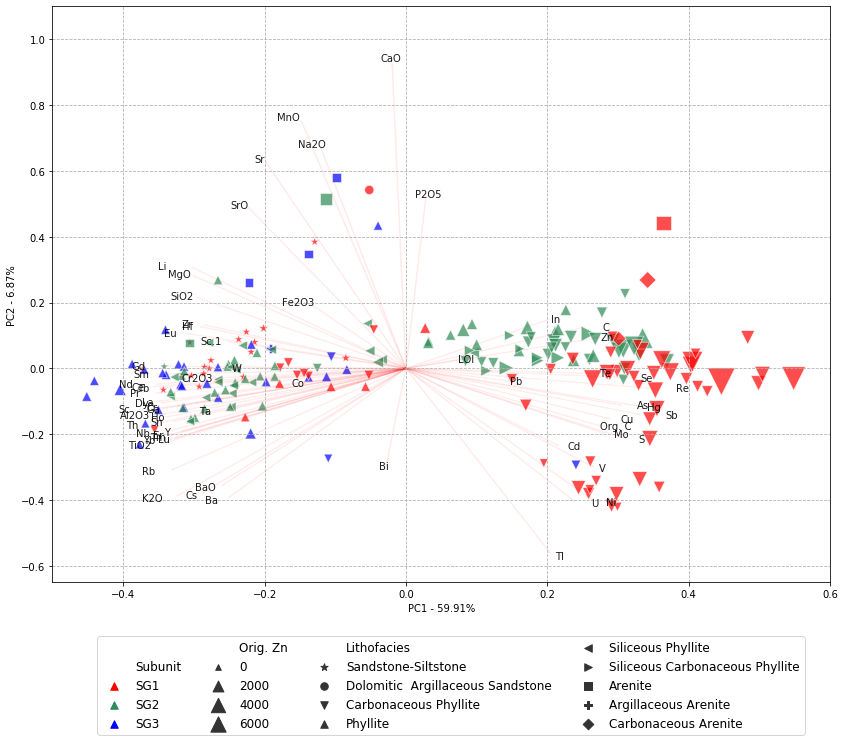

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

f, axes = plt.subplots(1,1)
X = data.loc[:,'Al2O3':'LOI'].copy()
y = data['Subunit_code'].copy()
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(
    x= xs * scalex, 
    y = ys * scaley, 
    hue = data['Subunit'],
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = data['Lithofacies'], 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    #s = 75,
    size = data['Orig. Zn'], 
    sizes=(75,750),
    alpha = 0.7,
        
    )
    
def myplot2(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(
    x= xs * scalex, 
    y = ys * scaley, 
    hue = data['Subunit'],
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = data['Lithofacies'], 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    #s = 75,
    size = data['Orig. Zn'], 
    sizes=(20,150),
    alpha = 0,
        
    )
    #plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2.3, coeff[i,1]*2.3,color = 'r',alpha = 0.05)
        if labels is None:
            plt.text(coeff[i,0]* 2.3, coeff[i,1] * 2.6, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* (2.3 + np.random.uniform(0.1,0.35)), coeff[i,1] * 2.35, labels[i], color = 'k', ha = 'center', va = 'center', size = 10, alpha = 0.9)
plt.xlim(-0.5,0.6)
plt.ylim(-0.65,1.1)

                

#Call the function. Use only the 2 PCs.
axes.plot(np.NaN, np.NaN, '-', color='none', label=' ')
myplot2(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), labels = data.loc[:,'Al2O3':'LOI'].columns.tolist())
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), labels = data.loc[:,'Al2O3':'LOI'].columns.tolist())

plt.xlabel("PC{} - {}%".format(1, np.round(pca.explained_variance_ratio_[0] * 100,2)))
plt.ylabel("PC{} - {}%".format(2,np.round(pca.explained_variance_ratio_[1]*100,2)))
plt.grid(ls = '--')
handles, labels = axes.get_legend_handles_labels()
handles = handles[:20]
labels = labels[:20]
axes.legend(handles = handles, labels = labels, ncol=4, prop={"size":12}, 
           bbox_to_anchor=(0.05,-0.275), markerscale=1.25,
            loc='lower left').set_visible(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0.05, hspace=0.15)
plt.savefig('../02_Export/FIGURES/pca_12.png', bbox_inches="tight", dpi=300)
#plot_as_emf(f, filename="../02_Export/FIGURES/pca_12.emf")

In [226]:
data.head()

,Sample,Unnamed: 0,Source,Year,UTM_X,Random_X,UTM_Y,Random_Y,UTM_Z,Z_True,Region,Occurrence,Section,Hole.ID,Depth,Unit,Subunit,Lithofacies,Orebody,Al2O3,BaO,CaO,Cr2O3,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SiO2,SrO,TiO2,Ba,Ce,Cr,Cs,Dy,Er,Eu,Ga,Gd,Hf,Ho,La,Lu,Nb,Nd,Pr,Rb,Sm,Sn,Sr,Ta,Tb,Th,Tm,U,V,W,Y,Yb,Zr,Cd,Co,Cu,Li,Mo,Ni,Pb,Sc,Zn,As,Bi,Hg,In,Re,Sb,Sc.1,Se,Te,Tl,S,C,Org. C,LOI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,org_Al2O3,org_BaO,org_CaO,org_Cr2O3,org_Fe2O3,org_K2O,org_MgO,org_MnO,org_Na2O,org_P2O5,org_SiO2,org_SrO,org_TiO2,org_Ba,org_Ce,org_Cr,org_Cs,org_Dy,org_Er,org_Eu,org_Ga,org_Gd,org_Hf,org_Ho,org_La,org_Lu,org_Nb,org_Nd,org_Pr,org_Rb,org_Sm,org_Sn,org_Sr,org_Ta,org_Tb,org_Th,org_Tm,org_U,org_V,org_W,org_Y,org_Yb,org_Zr,org_Cd,org_Co,org_Cu,org_Li,org_Mo,org_Ni,org_Pb,org_Sc,Orig. Zn,org_As,org_Bi,org_Hg,org_In,org_Re,org_Sb,org_Sc.1,org_Se,org_Te,org_Tl,org_S,org_C,org_C.organic,org_LOI,Na (Molar),Al (Molar),K (Molar),X_tsne_dist,Y_tsne_dist,X_tsne_dist_facies,Y_tsne_dist_facies,org_La_Th,Na_Al,K_Al,Test_PC,PC_SG_comb,org_Zr_10,scl_PC17,sum_occ,Subunit_code,Pb / Zn,Ba / Zn,BaO / Zn,Fe2O3 / Zn,Fe2O3 / Pb,Zn / Pb,Zn / Ba,Zn / BaO,Zn / Mn,Zn / Cd
0,VZRO032000,1,Fernandes,2016,307100.000,308995.000,8144353.000,8144674.000,578.200,403.600,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,174.600,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.584,3.541,4.177,1.344,7.716,7.258,6.990,2.443,5.387,3.424,10.176,1.344,5.675,3.417,1.032,1.121,-1.167,-1.793,-2.260,-3.323,-0.207,-1.703,-1.469,-3.389,0.334,-4.128,-0.666,0.186,-1.174,1.670,-1.435,-2.162,1.142,-3.261,-3.562,-0.700,-4.177,-1.819,1.158,-2.162,-0.018,-2.200,2.190,-3.168,-0.553,-0.003,0.428,-3.261,0.205,-0.371,-0.776,1.543,-2.428,-4.822,-6.237,-6.277,-10.080,-4.775,-1.593,-3.954,-5.920,-5.920,3.424,4.928,4.900,7.179,-5.090,0.719,-0.824,0.777,-2.470,0.545,-2.486,0.895,-0.612,-0.121,-0.382,0.379,-0.661,-0.297,1.148,0.306,0.306,0.618,-1.025,-0.629,0.423,-1.265,-0.563,0.122,-0.025,0.085,0.634,0.638,-0.258,-0.531,0.169,-0.009,-0.253,0.443,0.251,0.012,-0.526,-0.341,0.097,0.275,0.068,0.319,-0.149,0.373,0.429,-0.022,-0.064,-0.067,0.093,-0.112,-0.192,-0.040,-0.118,0.085,-0.122,-0.195,-0.008,0.102,-0.032,-0.109,-0.025,-0.002,0.001,-0.034,-0.002,0.000,139400,900,1700,100,58500,37000,28300,300,5700,800,684600.000,100,7600,795.000,73.200,80,8.120,4.340,2.720,0.940,21.200,4.750,6.000,0.880,36.400,0.420,13.400,31.400,8.060,138.500,6.210,3,81.700,1.000,0.740,12.950,0.400,4.230,83,3.000,25.600,2.890,233,1.098,15,26,40,1.000,32,18.000,12,122,2.300,0.210,0.051,0.049,0.001,0.220,5.300,0.500,0.070,0.070,800,3600,3500,34200,0.018,0.273,0.079,6.025,16.566,3.730,9.993,2.811,0.067,0.287,+PC2,+PC2/SG1,23.300,0.605,Serra da Pindaiba,1,-0.240,2.215,2.295,5.000,-20.818,-4.163,0.452,0.436,0.632,-0.487
1,VZRO032001,2,Fernandes,2016,307100.000,303235.000,8144353.000,8145102.000,578.200,379.900,North,Serra da Pindaiba,Retiro-Pindaiba-Lapa Azul,B5GF10,198.300,Serra do Garrote,SG1,Sandstone-Siltstone,nan,8.447,3.199,4.351,1.407,7.738,7.052,6.979,2.506,5.358,3.353,10.303,1.407,5.501,3.271,1.060,0.896,-1.337,-1.866,-2.323,-3.349,-0.371,-1.619,-1.358,-3.447,0.310,-4.192,-0.782,0.223,-1.124,1.470,-1.356,-2.505,0.747,-0.800,-3.541,-0.823,-4.248,-2.370,1.050,-2.100,-0.094,-2.331,2.282,-3.035,-0.633,-0.308,0.491,-3.198,0.098,-0.365,-0.896,2.134,-1.945,-5.031,-5.675,-5.901,-10.121,-4.625,-1.837,-3.709,-5.606,-5.724,3.199,4.403,4.240,7.070,-4.681,1.749,-0.275,0.922,-3.800,0.494,-4.341,0.711,1.617,-0.603,-1.481,-1.559,-2.344,-1.003,-1.969,0.521,-1.139,1.984,-1.056,2.551,1.007,-0.239,-0.021,-0.169,0.162,1.520,-0.560,0.388,-0.320,-0.586,-0.146,0.240,-0.314,0.375,0.095,0.196,-0.134,-0.061,0.013,-0.045,-0.294,-0.239,-0.210,0.051,-0.132,-0.195,0.00

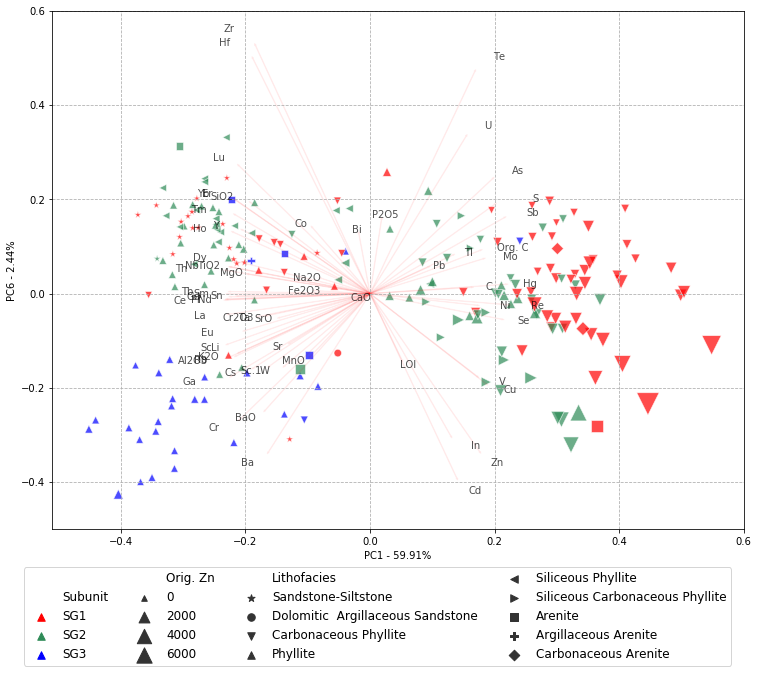

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

f, axes = plt.subplots(1,1)
X = data.loc[:,'Al2O3':'LOI'].copy()
y = data['Subunit_code'].copy()
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,5]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = -1.0/(ys.max() - ys.min())
    sns.scatterplot(
    x= xs * scalex, 
    y = ys * scaley, 
    hue = data['Subunit'],
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = data['Lithofacies'], 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    #s = 75,
    size = data['Orig. Zn'], 
    sizes=(50,500),
    alpha = 0.7,
        
    )
def myplot2(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(
    x= xs * scalex, 
    y = ys * scaley, 
    hue = data['Subunit'],
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = data['Lithofacies'], 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    #s = 75,
    size = data['Orig. Zn'], 
    sizes=(20,150),
    alpha = 0,
        
    )
    
    #plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*1.5, coeff[i,5]*-1.5,color = 'r',alpha = 0.05)
        if labels is None:
            plt.text(coeff[i,0]* 1.5, coeff[i,5] * -1.6, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* (1.5 + np.random.uniform(0.2,0.5)), coeff[i,5] * -1.6, labels[i], color = 'k', ha = 'center', va = 'center', size = 10, alpha = 0.7)
plt.xlim(-0.51,0.6)
plt.ylim(-0.5,0.6)

                

#Call the function. Use only the 2 PCs.
axes.plot(np.NaN, np.NaN, '-', color='none', label=' ')
myplot2(x_new[:,0:6],np.transpose(pca.components_[0:6, :]), labels = data.loc[:,'Al2O3':'LOI'].columns.tolist())
myplot(x_new[:,0:6],np.transpose(pca.components_[0:6, :]), labels = data.loc[:,'Al2O3':'LOI'].columns.tolist())


plt.xlabel("PC{} - {}%".format(1, np.round(pca.explained_variance_ratio_[0] * 100,2)))
plt.ylabel("PC{} - {}%".format(6,np.round(pca.explained_variance_ratio_[5]*100,2)))
plt.grid(ls = '--')
handles, labels = axes.get_legend_handles_labels()
handles = handles[:20]
labels = labels[:20]
axes.legend(handles = handles, labels = labels, ncol=4, prop={"size":12}, 
           bbox_to_anchor=(-0.05,-0.275), markerscale=1.25,
            loc='lower left').set_visible(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.8, wspace=0.05, hspace=0.15)
plt.savefig('../02_Export/FIGURES/pca_16.png', bbox_inches="tight", dpi=300)

In [92]:
data['Lithofacies'].unique().tolist()[2:6]

['Carbonaceous Phyllite',
 'Phyllite',
 'Siliceous Phyllite',
 'Siliceous Carbonaceous Phyllite']

In [93]:
X = data.loc[data['Lithofacies'].isin(data['Lithofacies'].unique().tolist()[2:6])].loc[:,'Al2O3':'LOI'].copy()
y = data.loc[data['Lithofacies'].isin(data['Lithofacies'].unique().tolist()[2:6])]['Subunit_code'].copy()

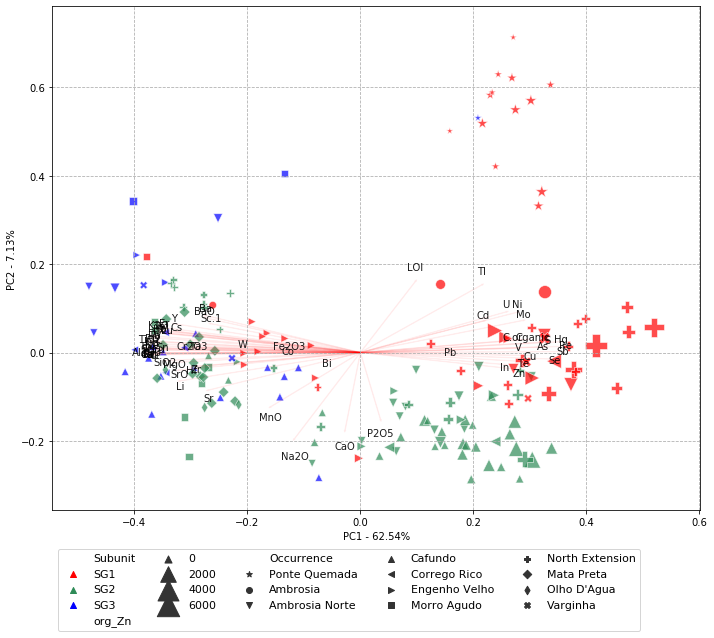

In [94]:
f, axes = plt.subplots(1,1)

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(
    x= xs * scalex, 
    y = ys * scaley, 
    hue = data.loc[data['Lithofacies'].isin(data['Lithofacies'].unique().tolist()[2:6])]['Subunit'],
    hue_order = ['SG1','SG2','SG3'],
    palette= ['red','seagreen','blue'],
    #palette = 'pastel',
    style = data.loc[data['Lithofacies'].isin(data['Lithofacies'].unique().tolist()[2:6])]['Occurrence'], 
    markers=['*','o','v','^','<','>','s','P','D','d','X','H','p'], 
    #s = 75,
    size = data.loc[data['Lithofacies'].isin(data['Lithofacies'].unique().tolist()[2:6])]['org_Zn'], 
    sizes=(50,500),
    alpha = 0.7,
        
    )
    #plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2.5, coeff[i,1]*.5,color = 'r',alpha = 0.05)
        if labels is None:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] * .6, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] * .6, labels[i], color = 'k', ha = 'center', va = 'center', size = 10, alpha = 0.9)
#plt.xlim(-0.5,0.6)
#plt.ylim(-0.65,1.1)

                

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), 
       labels = data.loc[data['Lithofacies'].isin(data['Lithofacies'].unique().tolist()[2:6])].loc[:,'Al2O3':'LOI'].columns.tolist())

plt.xlabel("PC{} - {}%".format(1, np.round(pca.explained_variance_ratio_[0] * 100,2)))
plt.ylabel("PC{} - {}%".format(2,np.round(pca.explained_variance_ratio_[1]*100,2)))
plt.grid(ls = '--')
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles = handles, labels = labels, ncol=5, prop={"size":11}, 
           bbox_to_anchor=(0,-0.25), 
            loc='lower left').set_visible(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.50, top=1.75, wspace=0.05, hspace=0.15)
plt.savefig('../02_Export/FIGURES/only_phyl_pca_12.png', bbox_inches="tight", dpi=300)
#plot_as_emf(f, filename="../02_Export/FIGURES/pca_12.emf")